In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import mlflow
%config IPCompleter.greedy=True

# Importing data

In [3]:
mlflow.autolog()

In [4]:
holidays = pd.read_csv("../data/raw/holidays.csv")
oil = pd.read_csv("../data/raw/oil.csv")
sample_sub = pd.read_csv("../data/raw/sample_sub.csv")
stores = pd.read_csv("../data/raw/stores.csv")
test = pd.read_csv("../data/raw/test.csv")
train = pd.read_csv("../data/raw/train.csv")
transactions = pd.read_csv("../data/raw/transactions.csv")

In [5]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [7]:
holidays["date"] = pd.to_datetime(holidays["date"].str.strip()) # df['Time stamp'] = pd.to_datetime(df['Time stamp'].str.strip(),

In [8]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [9]:
holidays.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [10]:
holidays.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [11]:
# holidays are fine

In [12]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [13]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


<Axes: >

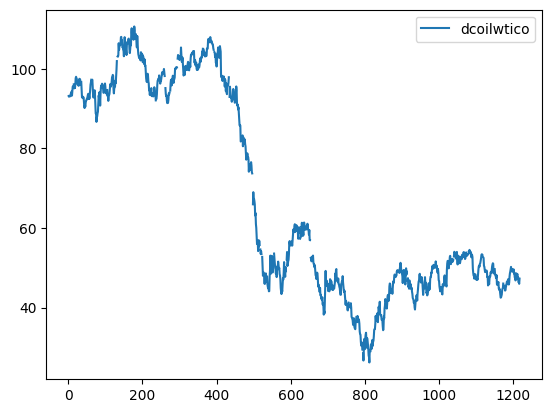

In [14]:
oil.plot()

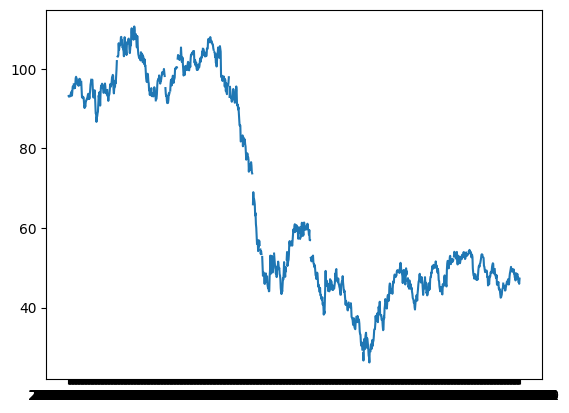

In [15]:
plt.plot(oil['date'], oil['dcoilwtico'])

In [16]:
# We need to handle missing values in Oil dataset

In [17]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [18]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [19]:
# store_nbr identifies the store at which the products are sold.
# cluster is a grouping of similar stores.

In [20]:
stores.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [21]:
stores['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [22]:
stores['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [23]:
stores['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [24]:
a = stores['cluster'].unique()
a.sort()
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [31]:
A = stores[stores['type'] == 'A']
B = stores[stores['type'] == 'B']
C = stores[stores['type'] == 'C']
D = stores[stores['type'] == 'D']
E = stores[stores['type'] == 'E']

In [36]:
A

,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11


In [37]:
B

,store_nbr,city,state,type,cluster
8,9,Quito,Pichincha,B,6
10,11,Cayambe,Pichincha,B,6
17,18,Quito,Pichincha,B,16
19,20,Quito,Pichincha,B,6
20,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6
30,31,Babahoyo,Los Rios,B,10
33,34,Guayaquil,Guayas,B,6
38,39,Cuenca,Azuay,B,6


In [38]:
C

,store_nbr,city,state,type,cluster
9,10,Quito,Pichincha,C,15
11,12,Latacunga,Cotopaxi,C,15
12,13,Latacunga,Cotopaxi,C,15
13,14,Riobamba,Chimborazo,C,7
14,15,Ibarra,Imbabura,C,15
15,16,Santo Domingo,Santo Domingo de los Tsachilas,C,3
16,17,Quito,Pichincha,C,12
18,19,Guaranda,Bolivar,C,15
21,22,Puyo,Pastaza,C,7
29,30,Guayaquil,Guayas,C,3


In [40]:
D

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
22,23,Ambato,Tungurahua,D,9
23,24,Guayaquil,Guayas,D,1


In [41]:
E

,store_nbr,city,state,type,cluster
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
35,36,Libertad,Guayas,E,10
42,43,Esmeraldas,Esmeraldas,E,10


In [42]:
# I can't understand what type is

In [43]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [44]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [50]:
transactions_1 = transactions[transactions['store_nbr'] == 1]
# Transactions of first store

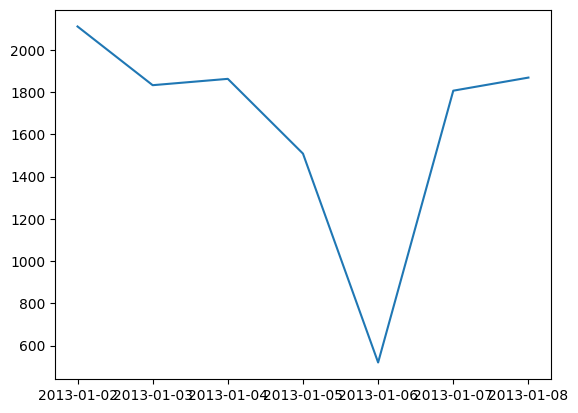

In [55]:
plt.plot(transactions_1.date[0:7], transactions_1.transactions[0:7])

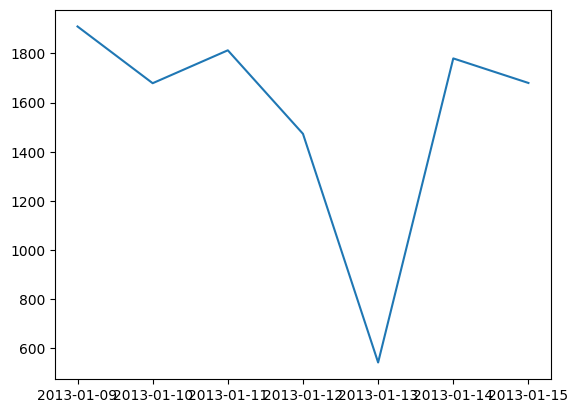

In [56]:
plt.plot(transactions_1.date[7:7+7], transactions_1.transactions[7:7+7])

In [57]:
# Waow, it looks like number of transactions is periodical modulo 7 days
# Maybe we should add day of the week column
# Let's check one more

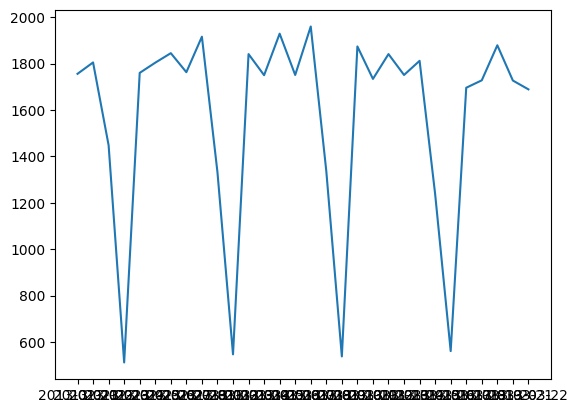

In [68]:
x = 50
plt.plot(transactions_1.date[x:x+30], transactions_1.transactions[x:x+30])

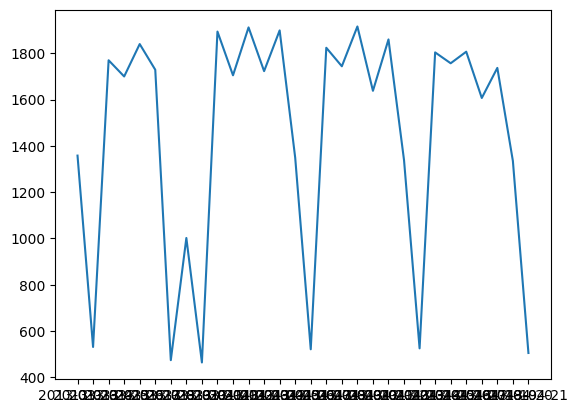

In [69]:
plt.plot(transactions_1.date[x+30:x+30+30], transactions_1.transactions[x+30:x+30+30])

In [70]:
# Looks like transactions are mothly periodic too!
# What if...

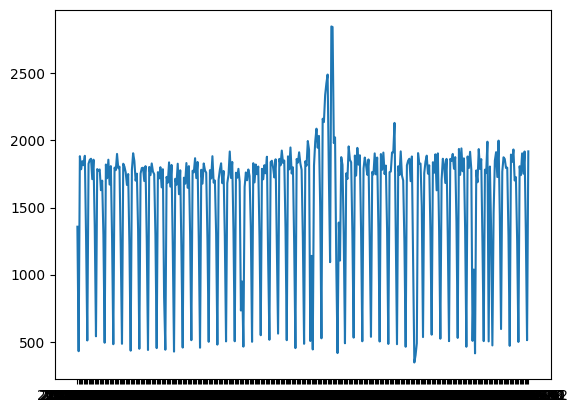

In [71]:
x = 150
plt.plot(transactions_1.date[x:x+365], transactions_1.transactions[x:x+365])

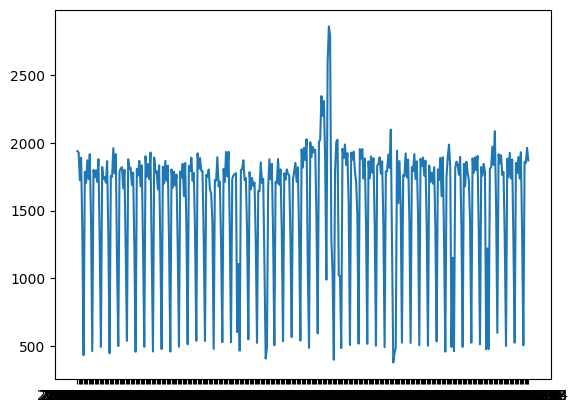

In [72]:
plt.plot(transactions_1.date[x+365:x+365+365], transactions_1.transactions[x+365:x+365+365])

In [73]:
# Even yearly periodic